# Задание 1
## Задача 1

In [1]:
import numpy as np
from lab1.task1.dichotomy import Dichotomy
from lab1.task1.golden_ratio import GoldenRatio
from lab1.task1.fibonacci import Fibonacci
from lab1.task1.watcher import Watcher
import matplotlib.pyplot as plt

Возьмем следующую унимодальную на отрезке [2.2, 2.8] функцию
$$f(x) = |\sin(x^2)|$$

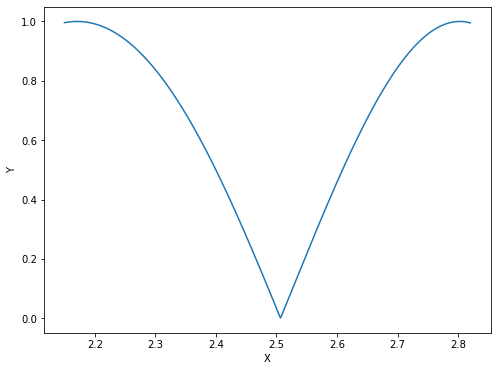

In [2]:
f = Watcher(lambda x: np.abs(np.sin(x ** 2)))
xs = np.linspace(2.15, 2.82, 1000)
ys = list(map(f, xs))
plt.figure(figsize=(8, 6))
plt.plot(xs, ys)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

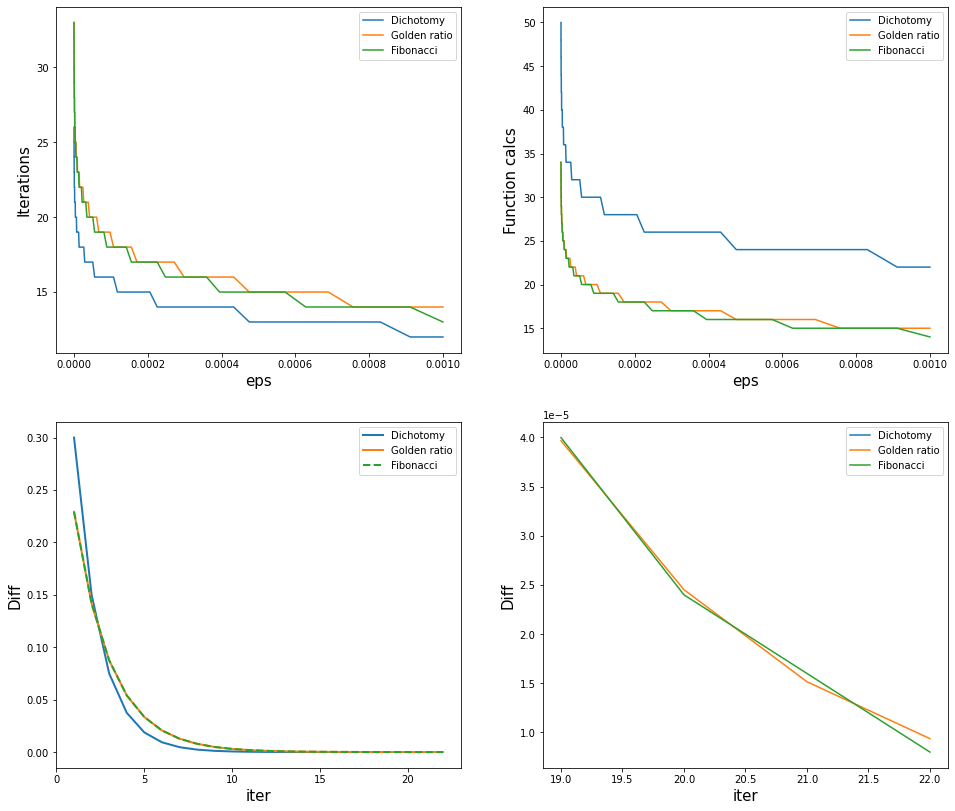

In [36]:
opts = [Dichotomy, GoldenRatio, Fibonacci]
fig = plt.figure(figsize=(16, 14))

# Eps/N
axn = fig.add_subplot(2, 2, 1)
axn.set_xlabel('eps', fontsize=15)
axn.set_ylabel('Iterations', fontsize=15)

# Eps/Calc
axc = fig.add_subplot(2, 2, 2)
axc.set_xlabel('eps', fontsize=15)
axc.set_ylabel('Function calcs', fontsize=15)

for opt_c in opts:
    epss = np.logspace(-7, -3, 100)
    ns = []
    calcs = []
    for eps in epss:
        opt = opt_c(f, eps, [2.2, 2.8])
        opt.opt()
        ns.append(len(opt.log_frame()))
        calcs.append(f.invocations)
    axn.plot(epss, ns, label=opt_c.name)
    axc.plot(epss, calcs, label=opt_c.name)

axn.legend()
axc.legend()

# Next iteration
axd = fig.add_subplot(2, 2, 3)
axd.set_xlabel('iter', fontsize=15)
axd.set_ylabel('Diff', fontsize=15)

axd_sc = fig.add_subplot(2, 2, 4)
axd_sc.set_xlabel('iter', fontsize=15)
axd_sc.set_ylabel('Diff', fontsize=15)

for opt_c in opts:
    opt = opt_c(f, 10e-6, [2.2, 2.8])
    opt.opt()
    diffs = []
    prev = -1
    log = opt.log_frame()
    for i, row in log.iterrows():
        now = row['r'] - row['l']
        if i > 0:
            diffs.append(prev - now)
        prev = now
    if opt_c == Fibonacci:
        st = "--"
    else:
        st = "-"
    axd.plot(range(1, len(log)), diffs, label=opt_c.name, linestyle=st, linewidth=2)
    axd_sc.plot(range(1, len(log))[18:], diffs[18:], label=opt_c.name)

axd.legend()
axd_sc.legend()
plt.show()